In [1]:
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.io as io

In [2]:
data = io.loadmat('sift_matches.mat')

In [3]:
u1 = data['x1']
v1 = data['y1']
u2 = data['x2']
v2 = data['y2']

In [4]:
u1.shape

(1, 150)

In [5]:
x1 = np.vstack((u1, v1))
x2 = np.vstack((v2, u2))

In [6]:
ones= np.ones(x1.shape[1])
twos= np.ones(x2.shape[1])

In [7]:
x1=np.vstack((x1,ones))
x2=np.vstack((x2,twos))

In [8]:
x1= x1.T
x2= x2.T

In [9]:
x1.shape

(150, 3)

In [10]:
imgLEF = cv2.imread('images/left_Frame.jpg')
imgRIG = cv2.imread('images/right_Frame.jpg')

In [11]:
imgLEF = cv2.cvtColor(imgLEF, cv2.COLOR_BGR2RGB)
imgRIG = cv2.cvtColor(imgRIG, cv2.COLOR_BGR2RGB)

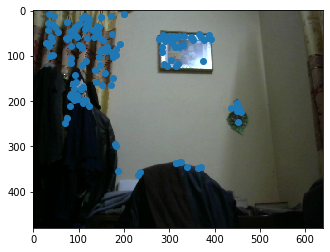

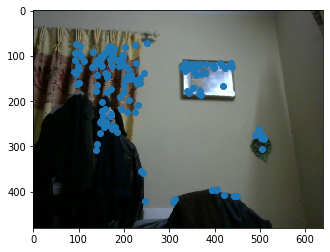

In [12]:
plt.imshow(imgLEF)
plt.scatter(u1,v1)
plt.show()
plt.imshow(imgRIG)
plt.scatter(u2,v2)
plt.show()

In [13]:
K = np.array([[1,0,0],[0,2,0],[0,0,1]])
I = np.array([[1,0,0],[0,1,0],[0,0,1]])
t1 = np.zeros((3,1))
Rt1 = np.hstack((I,t1))
t2 = np.array([[1,0,0]])
t2t = np.transpose(t2)
Rt2 = np.hstack((I, -t2t))

In [14]:
P1 = np.dot(K,Rt1)
P2 = np.dot(K,Rt2)
print(P2)

[[ 1  0  0 -1]
 [ 0  2  0  0]
 [ 0  0  1  0]]


In [15]:
def Vec2Skew(v):
    return np.array([[0, -v[2], v[1]],[v[2], 0, -v[0]], [-v[1], v[0], 0]])

In [16]:
Xh = np.zeros((0,4))
for i in range (100):
    skew1 = Vec2Skew(x1[i])
    skew2 = Vec2Skew(x2[i])
    A = np.vstack((np.dot(skew1,P1), np.dot(skew2,P2)))
    u, s ,v = np.linalg.svd(A)
    X=v[-1,:]
    Xn= X/X[-1]
    Xh = np.vstack((Xh, Xn))
    

In [17]:
Xh

array([[ 1.27547908e+00,  2.44274623e-01,  3.62432768e-03,
         1.00000000e+00],
       [ 5.09396261e+01,  2.58238042e+01,  1.33844194e-01,
         1.00000000e+00],
       [-1.46692592e-01, -2.57462991e-01, -3.11406662e-03,
         1.00000000e+00],
       [-7.04775049e-01, -5.74761064e-01, -4.45258493e-03,
         1.00000000e+00],
       [ 1.41971705e+00,  3.33770070e-01,  4.54339075e-03,
         1.00000000e+00],
       [-1.40939696e+01, -7.50622896e+00, -4.07195267e-02,
         1.00000000e+00],
       [ 1.57415539e+00,  4.20572373e-01,  5.61311104e-03,
         1.00000000e+00],
       [ 4.16734333e+00,  1.75467177e+00,  1.82405226e-02,
         1.00000000e+00],
       [ 1.06230657e+00,  9.47922586e-02,  1.72671606e-03,
         1.00000000e+00],
       [ 1.35624641e+00,  3.25320286e-01,  2.01619072e-03,
         1.00000000e+00],
       [ 1.07012601e+00,  1.00990956e-01,  1.87124738e-03,
         1.00000000e+00],
       [ 1.17541641e+00,  1.73787057e-01,  3.28673295e-03,
      

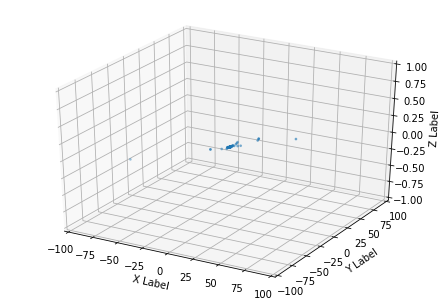

In [18]:
#Lets visualize
fig = plt.figure()
ax = Axes3D(fig)   
ax.set_zlim3d(-1, 1)                   
ax.set_ylim3d(-100, 100)                    
ax.set_xlim3d(-100, 100)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.scatter(Xh[:,0], Xh[:,1], Xh[:,2], s=3)
plt.show()


# Test data

In [19]:
data_coursera = io.loadmat('data.mat')

In [20]:
data_coursera

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Thu Apr 07 17:48:43 2016',
 '__version__': '1.0',
 '__globals__': [],
 'data': array([[(array([[ 717.52,  576.13],
        [ 762.74,  229.67],
        [ 321.13,  304.5 ],
        [ 886.09,  657.62],
        [ 488.19,  591.21],
        [ 236.05,  567.99],
        [ 156.36,  551.38],
        [ 776.1 ,  520.16],
        [ 408.46,  438.75],
        [ 484.21,  593.06],
        [ 225.95,  516.55],
        [ 736.55,  506.11],
        [ 533.93,  344.62],
        [ 123.62,  431.22],
        [ 580.23,  313.37],
        [ 657.64,  302.46],
        [ 532.34,  288.92],
        [ 684.01,  160.24],
        [ 765.14,  480.2 ],
        [ 198.96,  480.99],
        [ 280.56,  442.9 ],
        [ 280.56,  442.9 ],
        [ 888.76,  416.71],
        [ 585.63,  339.87],
        [ 782.02,  272.8 ],
        [ 734.88,  240.41],
        [ 376.7 ,  567.19],
        [ 617.73,  545.44],
        [ 645.12,  542.27],
        [ 915.86,  538.32],
    

In [21]:
tst = data_coursera['data']

In [22]:
test_x1 = tst[0][0][0]
test_x2 = tst[0][0][1]


In [23]:
print(test_x1.shape[0])
test_ones= np.ones(test_x1.shape[0])
test_twos= np.ones(test_x2.shape[0])

429


In [24]:
test_x1=np.vstack((test_x1.T,test_ones))
test_x2=np.vstack((test_x2.T,test_twos))

In [25]:
test_x1=test_x1.T
test_x2=test_x2.T

In [26]:
test_R = np.array([[0.982380561792663	,0.0134247834861782	,0.186408709561223],
                   [-0.0130676839776380	,0.999909670305363	,-0.00314433860780226],
                   [-0.186434083384427	,0.000653007020773837	,0.982467254484565]])

In [27]:
test_K = np.array([[568.996140852000	,0	,643.210559410000],
                   [0	,568.988362396000	,477.982801038000],
                   [0	,0	,1]])

In [28]:
test_C = np.array([[-0.921108648057872,0.128950954960229,0.367328884908121]])

In [29]:
test_I = np.array([[1,0,0],[0,1,0],[0,0,1]])
test_t1 = np.zeros((3,1))
test_Rt1 = np.hstack((test_I,test_t1))
test_t2 = -np.dot(test_R,test_C.T)
test_t2t = np.transpose(test_t2)
test_Rt2 = np.hstack((test_R, test_t2))

In [30]:
test_P1 = np.dot(test_K,test_Rt1)
test_P2 = np.dot(test_K,test_Rt2)
print(test_P2)

[[ 4.39054377e+02  8.05867101e+00  7.37999149e+02  1.32289206e+02]
 [-9.65476455e+01  5.69249092e+02  4.67813358e+02 -3.34177444e+02]
 [-1.86434083e-01  6.53007021e-04  9.82467254e-01 -5.32698853e-01]]


In [31]:
test_Xh = np.zeros((0,4))
for i in range (test_x1.shape[0]):
    skew1 = Vec2Skew(test_x1[i])
    skew2 = Vec2Skew(test_x2[i])
    test_A = np.vstack((np.dot(skew1,test_P1), np.dot(skew2,test_P2)))
    test_u, test_s ,test_v = np.linalg.svd(test_A)
    test_X=test_v[-1,:]
    test_Xn= test_X/test_X[-1]
    test_Xh = np.vstack((test_Xh, test_Xn))

In [32]:
test_Xh

array([[  0.97065663,   1.28722182,   7.50888213,   1.        ],
       [  2.02813245,  -4.15558034,   9.53892576,   1.        ],
       [-12.05038061,  -6.47603586,  21.35222965,   1.        ],
       ...,
       [  7.6013848 ,  -6.52032734,  15.01667751,   1.        ],
       [  4.8835132 ,  -6.97956284,  12.70148075,   1.        ],
       [ -5.27863374,  -8.98417214,  14.91642001,   1.        ]])

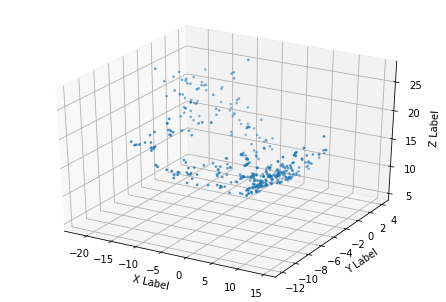

In [33]:
#Lets visualize
fig = plt.figure()
ax = Axes3D(fig)   
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.scatter(test_Xh[:,0], test_Xh[:,1], test_Xh[:,2], s=3)
plt.show()